In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import pyplot
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.font_manager



In [4]:
series = pd.read_csv('../Modelos de ETL - Data Procesada/DataEntrenamientoVariasVariables1.csv')

series.head()

,DateTime,Centro de Alto Rendimiento,Vel Viento,Dir Viento,Temperatura
0,2013-01-01 01:00:00,17,0,45,7
1,2013-01-01 02:00:00,33,0,224,7
2,2013-01-01 03:00:00,20,0,318,7
3,2013-01-01 04:00:00,19,0,326,7
4,2013-01-01 05:00:00,28,1,344,8


In [5]:
series['DateTime'] = pd.to_datetime(series['DateTime'], format= '%Y-%m-%d %H:%M:%S')
a = series["DateTime"][0]
type(a)

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
series1 = series
series2 = series[(series['DateTime'] >= '2014-01-01')]
series2

,DateTime,Centro de Alto Rendimiento,Vel Viento,Dir Viento,Temperatura
8395,2014-01-01 01:00:00,5,1,80,13
8396,2014-01-01 02:00:00,9,0,308,12
8397,2014-01-01 03:00:00,11,1,346,10
8398,2014-01-01 04:00:00,24,0,307,9
8399,2014-01-01 05:00:00,12,0,312,8
...,...,...,...,...,...
58760,2019-12-31 19:00:00,8,2,316,14
58761,2019-12-31 20:00:00,7,2,309,14
58762,2019-12-31 21:00:00,9,1,306,14
58763,2019-12-31 22:00:00,8,1,309,14


In [7]:
series3 = series2.drop(series2[series2['Centro de Alto Rendimiento']==0].index)

In [8]:
series3.shape

(42059, 5)

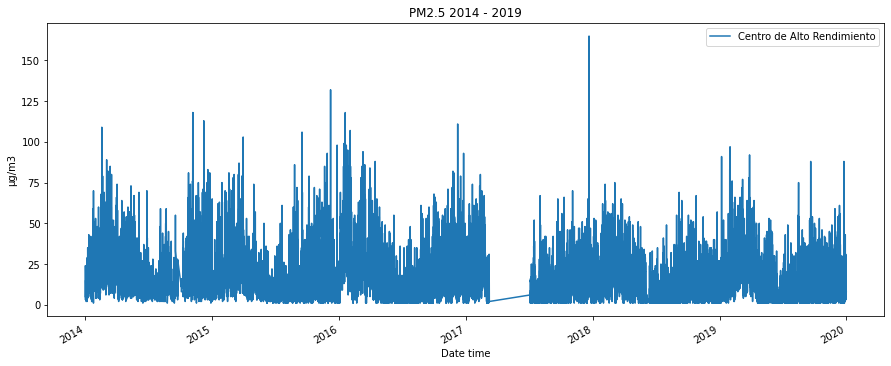

In [9]:
#series3 = series2.replace({0:None})

# plot the data
series3.plot(x='DateTime', y='Centro de Alto Rendimiento', figsize=(15,6))
plt.xlabel('Date time')
plt.ylabel('µg/m3')
plt.title('PM2.5 2014 - 2019');

In [10]:
del series3["DateTime"]

In [11]:
series3

,Centro de Alto Rendimiento,Vel Viento,Dir Viento,Temperatura
8395,5,1,80,13
8396,9,0,308,12
8397,11,1,346,10
8398,24,0,307,9
8399,12,0,312,8
...,...,...,...,...
58760,8,2,316,14
58761,7,2,309,14
58762,9,1,306,14
58763,8,1,309,14


Text(0.5, 1.0, 'PM 2.5 - Temperatura')

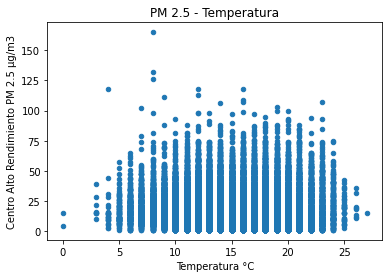

In [13]:
series3.plot.scatter(x='Temperatura', y='Centro de Alto Rendimiento',)
plt.xlabel("Temperatura °C")
plt.ylabel("Centro Alto Rendimiento PM 2.5 µg/m3")
plt.title("PM 2.5 - Temperatura")

Text(0.5, 1.0, 'PM 2.5 - Vel Viento')

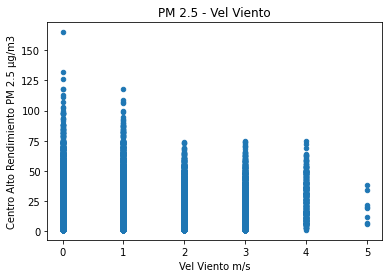

In [14]:
series3.plot.scatter(x='Vel Viento', y='Centro de Alto Rendimiento',)
plt.xlabel("Vel Viento m/s")
plt.ylabel("Centro Alto Rendimiento PM 2.5 µg/m3")
plt.title("PM 2.5 - Vel Viento")

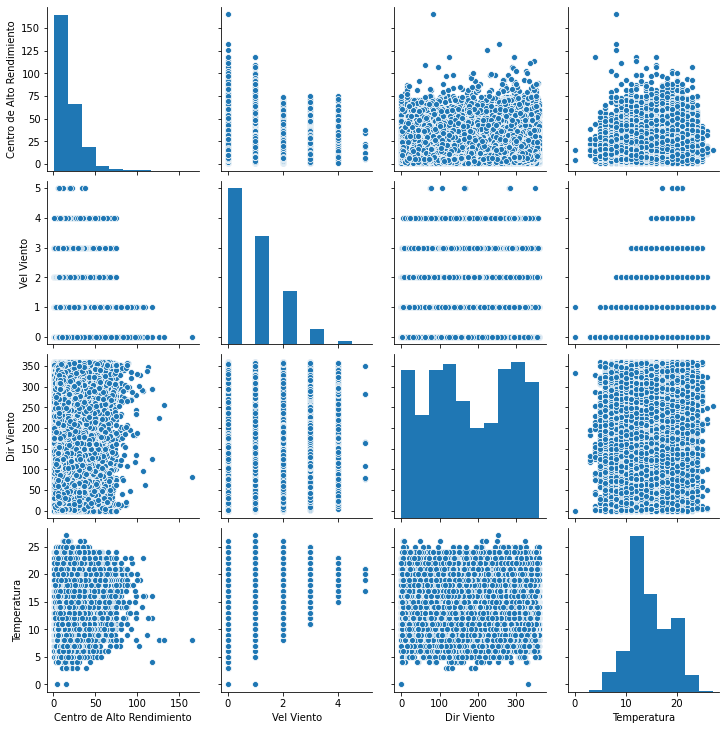

In [15]:
sns.pairplot(series3)

In [16]:
matrixcorrelation = series3.corr()
matrixcorrelation

,Centro de Alto Rendimiento,Vel Viento,Dir Viento,Temperatura
Centro de Alto Rendimiento,1.000000,-0.062255,0.150851,0.012122
Vel Viento,-0.062255,1.000000,-0.072270,0.558096
Dir Viento,0.150851,-0.072270,1.000000,-0.070059
Temperatura,0.012122,0.558096,-0.070059,1.000000


<AxesSubplot:>

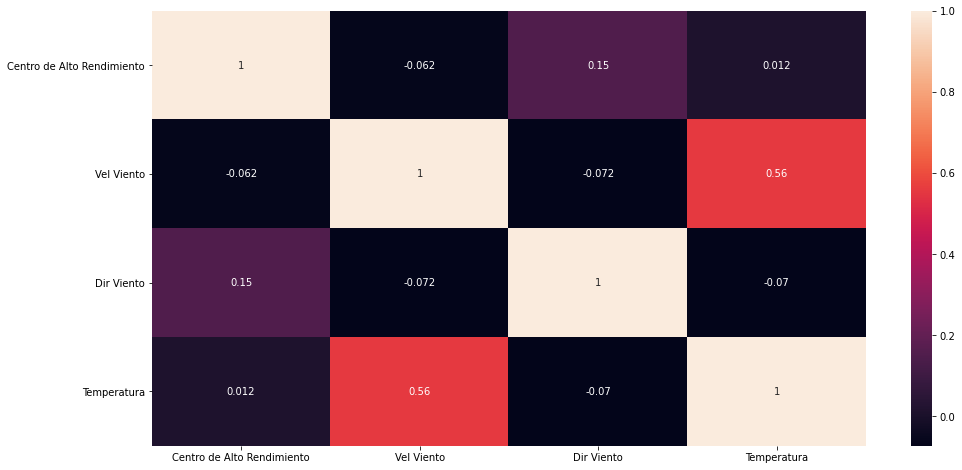

In [17]:
fig, ax  = plt.subplots(figsize=(16,8)) ##Cuando el color posee una tendencia a ser mas claro, significa mas correlación
sns.heatmap(matrixcorrelation,annot=True)

In [18]:
series3.describe()
series4 = series3
series4


,Centro de Alto Rendimiento,Vel Viento,Dir Viento,Temperatura
8395,5,1,80,13
8396,9,0,308,12
8397,11,1,346,10
8398,24,0,307,9
8399,12,0,312,8
...,...,...,...,...
58760,8,2,316,14
58761,7,2,309,14
58762,9,1,306,14
58763,8,1,309,14


In [19]:
del series4["Vel Viento"]

In [20]:
del series4["Dir Viento"]

In [21]:
series4

,Centro de Alto Rendimiento,Temperatura
8395,5,13
8396,9,12
8397,11,10
8398,24,9
8399,12,8
...,...,...
58760,8,14
58761,7,14
58762,9,14
58763,8,14


In [22]:
train, test = train_test_split(series4, test_size = 0.2, shuffle = False)
print(len(train))
print(len(test))

33647
8412


In [25]:
series3.describe()

,Centro de Alto Rendimiento,Temperatura
count,42059.000000,42059.000000
mean,17.115100,14.549038
std,13.472754,3.887278
min,1.000000,0.000000
25%,7.000000,12.000000
50%,13.000000,14.000000
75%,24.000000,18.000000
max,165.000000,27.000000


In [29]:
 series7 = series3.iloc[1000:2200] 

In [30]:
series7

,Centro de Alto Rendimiento,Temperatura
9434,24,9
9435,28,8
9436,25,7
9437,35,13
9438,18,18
...,...,...
10806,54,13
10807,64,12
10808,58,12
10809,42,12


In [32]:
X1 = series7.values
X1

len (series7)

1200

In [33]:
# Define "classifiers" to be used
classifiers = {
    "OCSVM": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.25)}
colors = ['m', 'b']
legend1 = {}
legend2 = {}

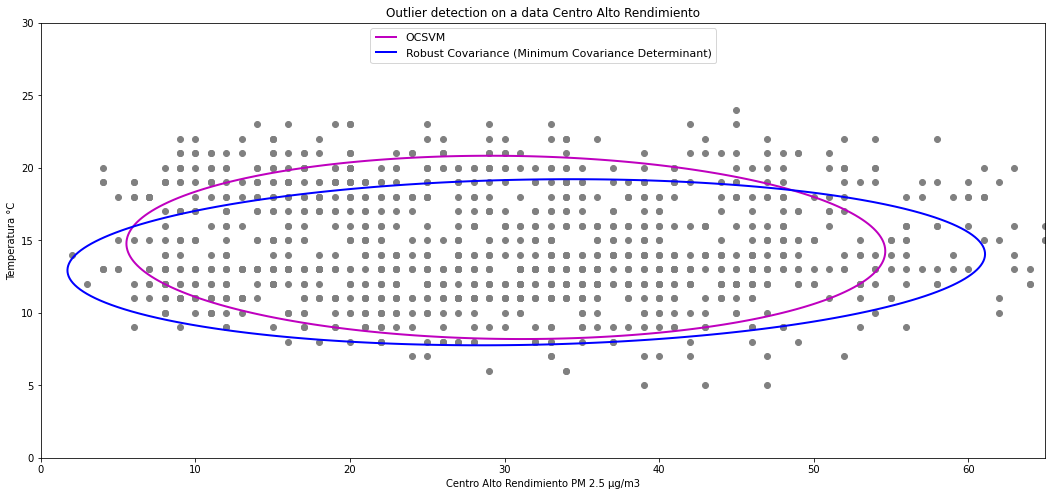

In [36]:
# Generate some abnormal novel observations

xx1, yy1 = np.meshgrid(np.linspace(0, 65, 200), np.linspace(0, 30, 200))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1,figsize=(18,8))
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])
    
    
legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1,figsize=(18,9))  # two clusters
plt.title("Outlier detection on a data Centro Alto Rendimiento")
plt.scatter(X1[:, 0], X1[:, 1], color='grey')
plt.ylim((yy1.min(), yy1.max()))
plt.xlim((xx1.min(), xx1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.ylabel("Temperatura °C")
plt.xlabel("Centro Alto Rendimiento PM 2.5 µg/m3")

plt.show()

In [ ]:
# Get data
X1 = load_wine()['data'][:, [1, 2]]  # two clusters
X1

In [ ]:
# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 6, 500), np.linspace(1, 4.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("outlying points", xy=(4, 2),
             xycoords="data", textcoords="data",
             xytext=(3, 1.25), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.ylabel("ash")
plt.xlabel("malic_acid")

plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm



In [ ]:
xx, yy = np.meshgrid(np.linspace(0, 6, 500), np.linspace(1, 4.5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()